# KNN- Predict whether a person will have diabetes or not

In [46]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [47]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# we can see on the columns 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin'	'BMI' there are 0 values 

# but it can't be 0 then it will affect our dataset

In [5]:
# Checking null value

data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [51]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [52]:
# Replace 0 values on those columns

not_zero_column = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# creating a loop to first transform 0 values in to NaN

for column in not_zero_column:
    data[column] = data[column].replace(0, np.NaN)
    # now getting the mean value on those column
    mean = int(data[column].mean(skipna = True))  # skipping the na value
    # replacing NaN value with the mean
    data[column] = data[column].replace(np.NaN, mean)

In [53]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682292,72.386719,29.108073,155.28125,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.435999,12.096642,8.791221,85.02155,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.00000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.50000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,155.00000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.00000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.00000,67.100000,2.420000,81.000000,1.000000


# Now it seems perfect :)

In [73]:
# splitting the dataset in to train and test

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    155.0  33.6   
1              1     85.0           66.0           29.0    155.0  26.6   
2              8    183.0           64.0           29.0    155.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    155.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    155.0  30.1   
767            1     93.0           70.0           31.0    155.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [74]:
# checking the values of y
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Rule of Thumb- Any algorithm that computes distance or assumes normality, scale your features

In [75]:
# Feature Scaling

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [76]:
# Calculating K

print(len(y_test))
import math
math.sqrt(len(y_test))

# usally we need this square root value to decide our K

# here K = 12 but as it is even number we will take odd number 11

154


12.409673645990857

# N_neighbors here is 'K'

# p is the power parameter to define the metric used, which is 'Euclidean' in our case

In [77]:
# Define the KNN classifier model and fit the train data in the model

KNN = KNeighborsClassifier(n_neighbors= 11, p=2, metric= 'euclidean')

# Fit the model

KNN.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [78]:
# predicting the value and store it in a variable

y_pred = KNN.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1])

# Evaluate the Model

In [79]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84  9]
 [32 29]]


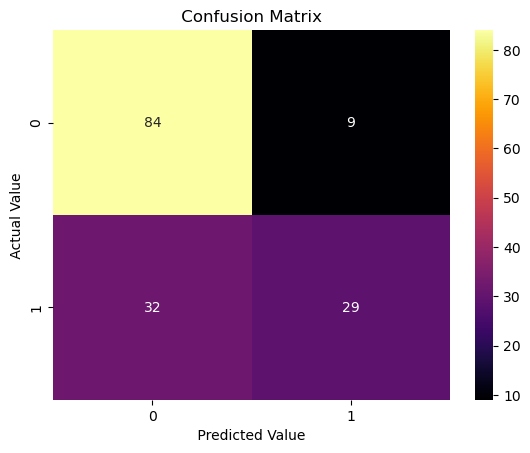

In [80]:
sns.heatmap(cm , annot= True, cmap = 'inferno')
plt.xlabel(' Predicted Value ')
plt.ylabel(' Actual Value ')
plt.title(' Confusion Matrix ')
plt.show()

In [81]:
# getting accuracy score

print(round(accuracy_score(y_test,y_pred) * 100, 2), '%')

73.38 %


In [82]:
# getting f1 score

print(round(f1_score(y_test,y_pred) * 100, 2), '%')

58.59 %


# f1_score is pretty low

In [83]:
# Classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80        93
           1       0.76      0.48      0.59        61

    accuracy                           0.73       154
   macro avg       0.74      0.69      0.69       154
weighted avg       0.74      0.73      0.72       154



# let's do some EDA

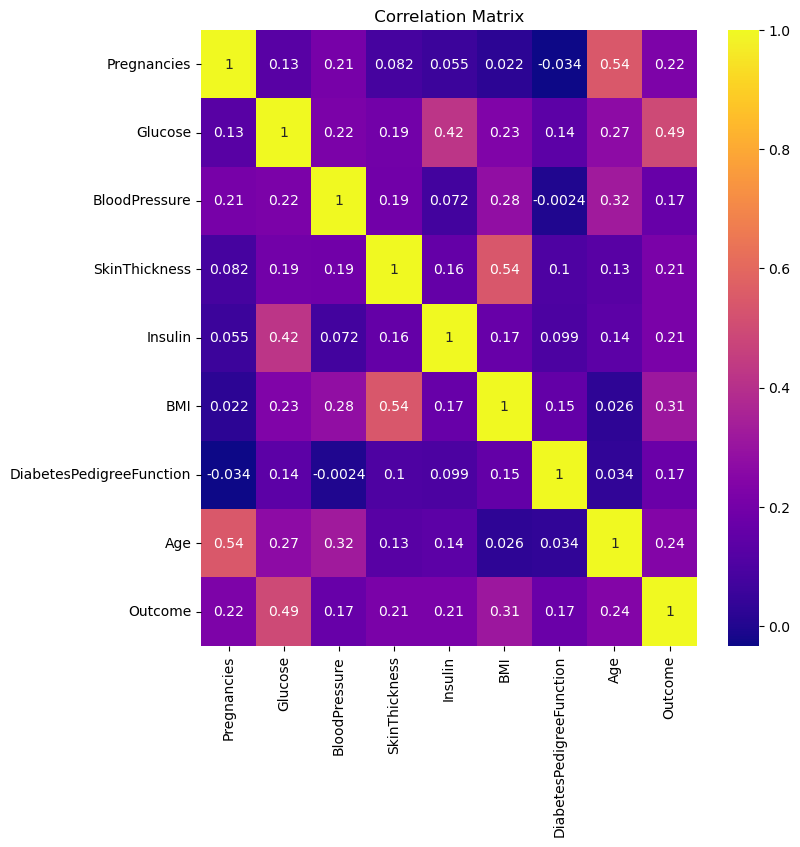

In [84]:
plt.figure(figsize = (8,8))
sns.heatmap(data.corr(), annot= True, cmap= 'plasma')
plt.title(' Correlation Matrix ')
plt.show()

# From here we can give the conclusion that Glucose has the maximum effect on the outcome followed by BMI

In [85]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47,1


<Axes: xlabel='Glucose', ylabel='BMI'>

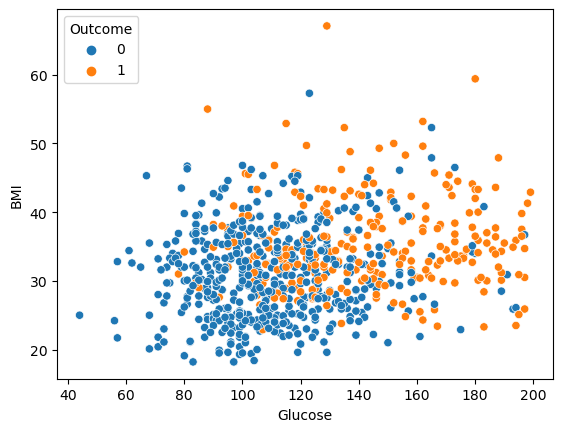

In [86]:
sns.scatterplot(data= data, x= 'Glucose', y= 'BMI', hue = 'Outcome')

# conclusion from the scatter plot : High Glucose & High BMI people are more tend to have Diabetes

# Let's do some Logistic Regression to predict the model

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
model_LR = LogisticRegression()
model_LR

LogisticRegression()

In [89]:
# Fitting the data

model_LR.fit(X_train, y_train)

LogisticRegression()

In [90]:
# predicting the outcome

y_pred_LR = model_LR.predict(X_test)
y_pred_LR

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1])

In [91]:
# getting accuracy score

print(round(accuracy_score(y_test,y_pred_LR) * 100, 2), '%')

77.92 %


# Getting better result than KNN method

In [92]:
# printing classification report

print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83        93
           1       0.81      0.57      0.67        61

    accuracy                           0.78       154
   macro avg       0.79      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



In [94]:
# printing f1_score

print(round(f1_score(y_test,y_pred_LR) * 100, 2), '%')

67.31 %


# much better f1_score than the KNN method

In [96]:
# EDA

print(data.Age.min())
print(data.Age.max())

21
81


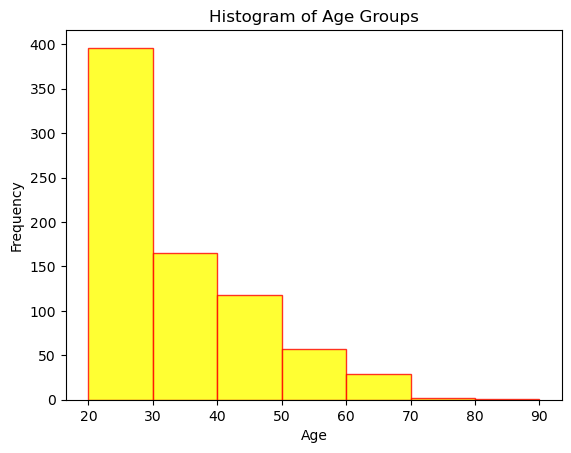

In [108]:
# Define age groups
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]  # Example age group boundaries
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

# Create histogram
plt.hist(data.Age, bins=age_bins, edgecolor='red', alpha=0.8, color= 'yellow')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Groups')

# Show the plot
plt.show()

# Let's try Naive Bayes Classifier to predict the model

In [115]:
# First check with the Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

In [116]:
# creating model object

model_GNB = GaussianNB()
model_GNB

GaussianNB()

In [117]:
# fitting the model

model_GNB.fit(X,y)

GaussianNB()

In [126]:
# predicting the outcome

y_pred_GNB = model_GNB.predict(X_test)
y_pred_GNB

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [122]:
# getting accuracy score

print(round(accuracy_score(y_test,y_pred_GNB) * 100, 2), '%')

61.04 %


# very poor score but little bit better than KNN method

In [123]:
# printing f1_score

print(round(f1_score(y_test,y_pred_GNB) * 100, 2), '%')

6.25 %


In [124]:
# printing classification report

print(classification_report(y_test, y_pred_GNB))

              precision    recall  f1-score   support

           0       0.61      0.99      0.75        93
           1       0.67      0.03      0.06        61

    accuracy                           0.61       154
   macro avg       0.64      0.51      0.41       154
weighted avg       0.63      0.61      0.48       154



# Extremely Poor f1_score

In [130]:
# Let's try Multinomial Naive Bayes


from sklearn.naive_bayes import MultinomialNB


# creating model object

model_MNB = MultinomialNB()
model_MNB

MultinomialNB()

In [128]:
# fitting the model

model_MNB.fit(X,y)

# predicting the outcome

y_pred_MNB = model_MNB.predict(X_test)
y_pred_MNB

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [129]:
# getting accuracy score

print(round(accuracy_score(y_test,y_pred_MNB) * 100, 2), '%')

# printing f1_score

print(round(f1_score(y_test,y_pred_MNB) * 100, 2), '%')

# printing classification report

print(classification_report(y_test, y_pred_MNB))

61.04 %
3.23 %
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        93
           1       1.00      0.02      0.03        61

    accuracy                           0.61       154
   macro avg       0.80      0.51      0.39       154
weighted avg       0.76      0.61      0.47       154



# Extremely failed model

In [131]:
# Let's try Bernoulli Naive Bayes


from sklearn.naive_bayes import BernoulliNB


# creating model object

model_BNB = BernoulliNB()
model_BNB

BernoulliNB()

In [132]:
# fitting the model

model_BNB.fit(X,y)

# predicting the outcome

y_pred_BNB = model_BNB.predict(X_test)
y_pred_BNB

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [133]:
# getting accuracy score

print(round(accuracy_score(y_test,y_pred_BNB) * 100, 2), '%')

# printing f1_score

print(round(f1_score(y_test,y_pred_BNB) * 100, 2), '%')

# printing classification report

print(classification_report(y_test, y_pred_BNB))

31.82 %
47.76 %
              precision    recall  f1-score   support

           0       0.07      0.01      0.02        93
           1       0.34      0.79      0.48        61

    accuracy                           0.32       154
   macro avg       0.21      0.40      0.25       154
weighted avg       0.18      0.32      0.20       154



# Let's try with Decision Tree Model -------

In [135]:
# importing Decistion Tree classifier
from sklearn.tree import DecisionTreeClassifier

# creating model object

model_DT = DecisionTreeClassifier()
model_DT

DecisionTreeClassifier()

In [136]:
# fitting the model

model_DT.fit(X,y)

# predicting the outcome

y_pred_DT = model_DT.predict(X_test)
y_pred_DT

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [137]:
# getting accuracy score

print(round(accuracy_score(y_test,y_pred_DT) * 100, 2), '%')

# printing f1_score

print(round(f1_score(y_test,y_pred_DT) * 100, 2), '%')

# printing classification report

print(classification_report(y_test, y_pred_DT))

60.39 %
0.0 %
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        93
           1       0.00      0.00      0.00        61

    accuracy                           0.60       154
   macro avg       0.30      0.50      0.38       154
weighted avg       0.36      0.60      0.45       154



# Decision Tree is failed with 0% f1_score because this kind of data is not suitable for Decision tree as it can't classify data into decision node

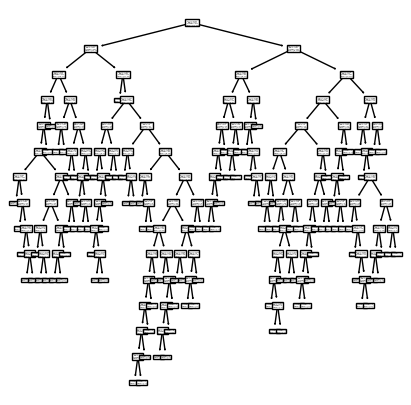

In [138]:
from sklearn import tree

plt.figure(figsize=(5,5))
tree.plot_tree(model_DT.fit(X_train,y_train))
plt.show()

# Conclusion: It fails extremely because the all our independent variables are not categorical but continous, also the dataset in non linear in feature

# As decision tree fails so we can say Random Forest algorithm will also fail in this model

# Now let's check with Support Vector Machine --------

In [156]:
# importing the SVM classifier and creating the object

from sklearn.svm import SVC #Support Vector Classifier

# creating model object

model_SVM = SVC(kernel='linear')  #kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} default='rbf'
model_SVM

#later we will check with different kernel

SVC(kernel='linear')

In [157]:
# fitting the model

model_SVM.fit(X,y)

# predicting the outcome

y_pred_SVM = model_SVM.predict(X_test)
y_pred_SVM

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [158]:
# getting accuracy score

print(round(accuracy_score(y_test,y_pred_SVM) * 100, 2), '%')

# printing f1_score

print(round(f1_score(y_test,y_pred_SVM) * 100, 2), '%')

# printing classification report

print(classification_report(y_test, y_pred_SVM))

60.39 %
0.0 %
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        93
           1       0.00      0.00      0.00        61

    accuracy                           0.60       154
   macro avg       0.30      0.50      0.38       154
weighted avg       0.36      0.60      0.45       154



# again SVM model failed enormously because of Nonlinear Decision Boundaries, Imbalanced Classes

# --- Final Conclusion : Logistic Regression gives better result in this model among all the other Supervised Learning model ---